                                            Analisis Exploratorio de los datos - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
datos=pd.read_csv('data/new_movies.csv')
datos.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'id_collection', 'name_collection',
       'id_genres', 'name_genres', 'id_companies', 'name_companies',
       'iso_countries', 'name_countries', 'iso_lenguages', 'name_lenguages',
       'release_year', 'return'],
      dtype='object')

Se considera que la mejor forma de realizar una recomendación es teniendo en cuenta el genero y las palabras asociadas a la trama de la pelicula incluyendo el titulo de estas, por esta razón se inicia el exploratorio de datos generando una nube de palabras que nos enseñen las palabras mas comunes de las columnas title, overview y genres.

In [3]:
datos['overview'] = datos['overview'].apply(lambda x: str(x) if pd.notnull(x) else "")
overviews = ' '.join(datos['overview'])
titles = ' '.join(datos['title'])
datos['name_genres'] = datos['name_genres'].apply(lambda x: str(x) if pd.notnull(x) else "")
genres =' '.join(datos['name_genres'])

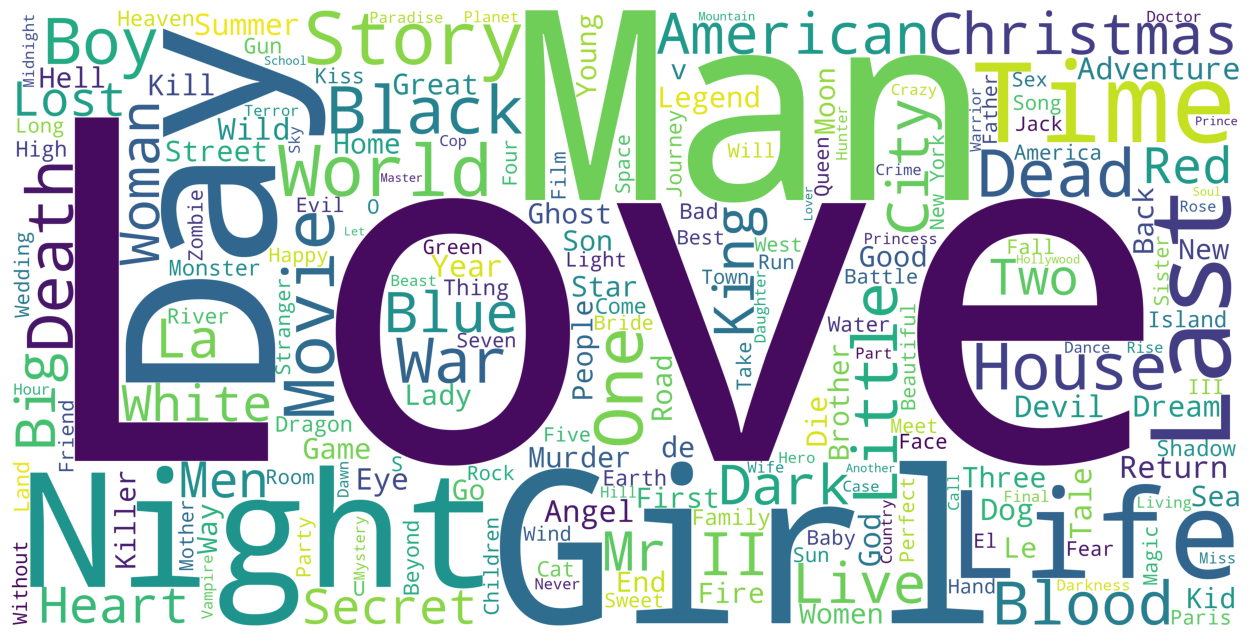

In [4]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(titles)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Como se puede observar la palabra mas común asociada al titulo de las peliculas es la palabra Love-Amor que esta relacionada a peliculas de romance principalmente, sin embargo si queremos asegurarnos de las 10 palabras mas frecuentes seria bueno realizar un histograma con los conteos de cada una

In [10]:
lista_palabras = titles.split()
palabras_irrelevantes = ["The ","the", "of", "and", "in",'A','a','to','my','i','&','on','2','is','from','you','with','at','for','one']
lista_palabras_filtradas = [palabra for palabra in lista_palabras if palabra.lower() not in palabras_irrelevantes]
serie_palabras = pd.Series(lista_palabras_filtradas)
conteo_palabras=serie_palabras.value_counts()
top_10_palabras = conteo_palabras.head(10)
top_10_palabras

Man      638
Love     634
Story    391
Night    382
Life     374
Last     343
Me       325
Girl     296
Dead     277
Day      263
dtype: int64

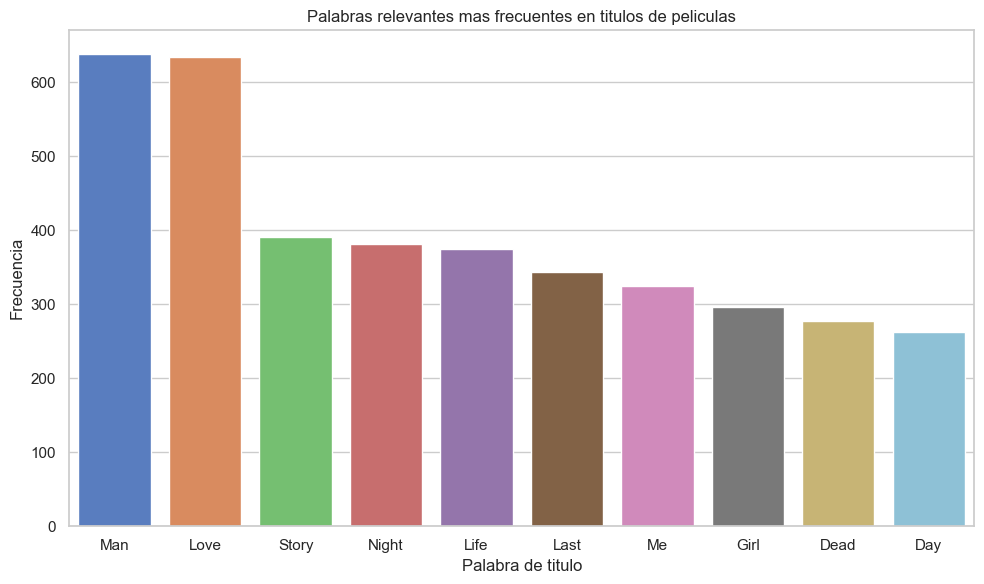

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_palabras.index, y=top_10_palabras.values, palette="muted")
plt.xlabel('Palabra de titulo')
plt.ylabel('Frecuencia')
plt.title('Palabras relevantes mas frecuentes en titulos de peliculas')
plt.xticks()
plt.tight_layout()
plt.show()

En este grafico nos damos cuenta que la palabra 'man' es la palabra (relevante) mas repetida de los titulos de las peliculas a pesar de que se llego a pensar de que era la palabra Love por su tamaño en el anterior diagrama, cabe aclarar que la diferencia es minima y se pueden observar 10 palabras mas frecuentes

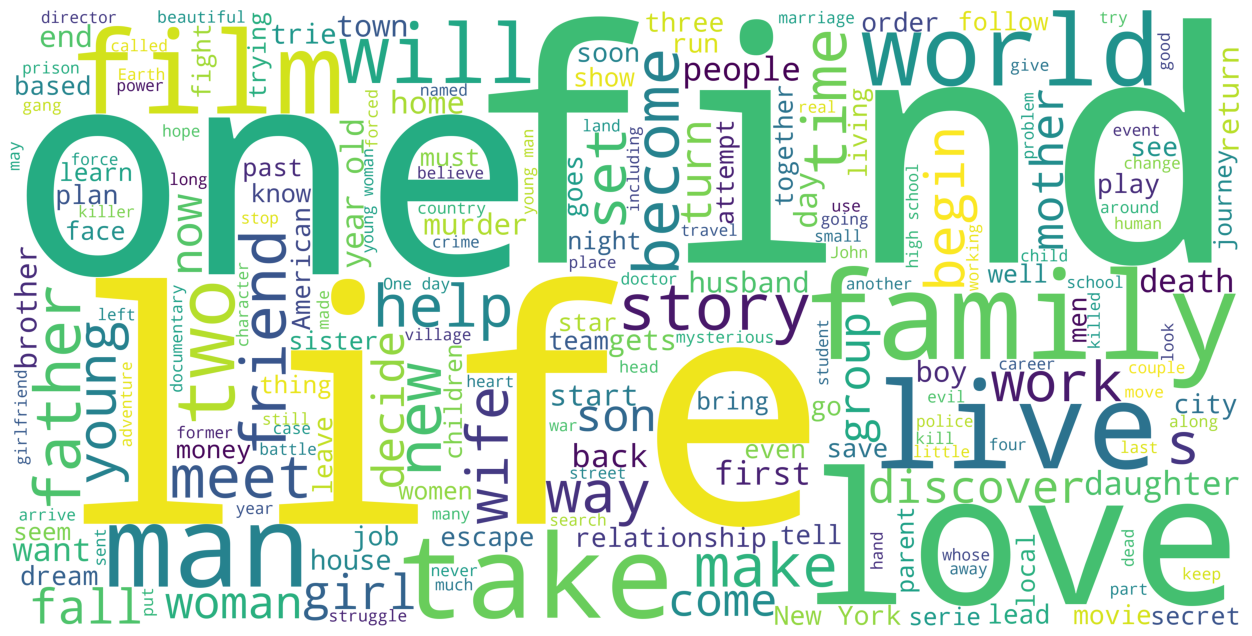

In [5]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overviews)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Las palabra mas común asociada al overview de las peliculas son las palabras find-encontrar y life-vida que estan directamente asociadas a la trama de las peliculas y la historia de los protagonistas, sin embargo si queremos asegurarnos de las 10 palabras mas frecuentes seria bueno realizar un histograma con los conteos de cada una

In [12]:
lista_palabras = overviews.split()
palabras_irrelevantes = ["The ","the", "of", "and", "in",'A','a','to','my','i','&','on','2','is','from','you','with','at','for','one','his','her','he','by','that','an','who',
                         'as','their','has','are','they','she','but','into','when','him','be','up','out','this','about','it','have','was','two','after','all','will','new',
                         'only','which','not','them','-','where','get','finds','must']
lista_palabras_filtradas = [palabra for palabra in lista_palabras if palabra.lower() not in palabras_irrelevantes]
serie_palabras = pd.Series(lista_palabras_filtradas)
conteo_palabras=serie_palabras.value_counts()
top_10_palabras = conteo_palabras.head(10)
top_10_palabras

young     5910
life      5033
film      4751
story     3893
man       3893
love      3745
find      3534
family    3222
woman     2652
years     2459
dtype: int64

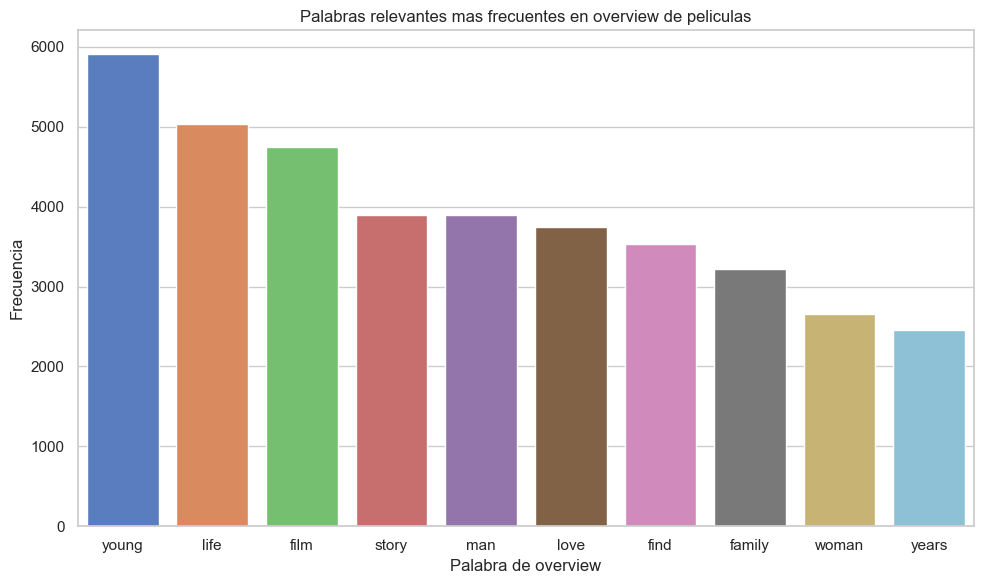

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_palabras.index, y=top_10_palabras.values, palette="muted")
plt.xlabel('Palabra de overview')
plt.ylabel('Frecuencia')
plt.title('Palabras relevantes mas frecuentes en overview de peliculas')
plt.xticks()
plt.tight_layout()
plt.show()

En el histograma se pueden encontrar las palabras que encontramos con mayor frecuencia en la nube de palabras, sin embargo la nube de palabras difiere con el histograma ya que este ultimo presenta la palabra 'young'-joven como la mas frecuente.

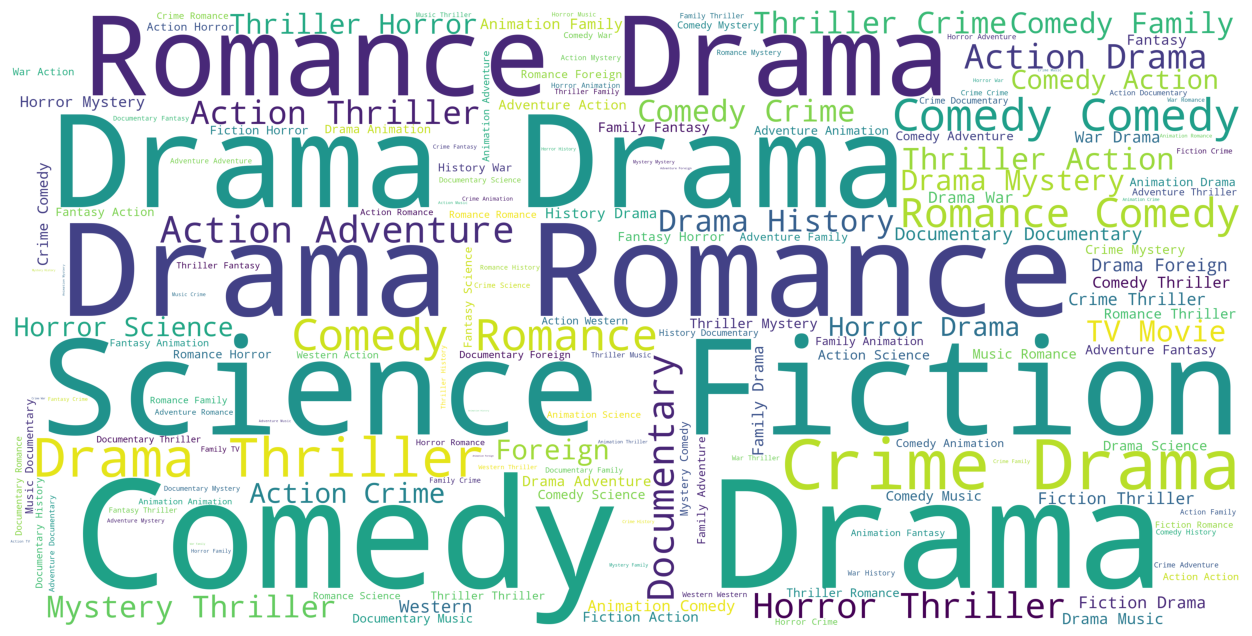

In [9]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(genres)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Se podria llegar a observar que la palabra mas frecuente de la columna de generos esta entre Comedy-Comedia, Science-Ciencia y Fiction-Ficción, sin embargo no se ve muy claro la diferencia por lo que se debe realizar un histograma como se hizo con las anteriores features.

In [14]:
lista_palabras = genres.split()
palabras_irrelevantes = ["The ","the", "of", "and", "in",'A','a','to','my','i','&','on','2','is','from','you','with','at','for','one','his','her','he','by','that','an','who',
                         'as','their','has','are','they','she','but','into','when','him','be','up','out','this','about','it','have','was','two','after','all','will','new',
                         'only','which','not','them','-','where','get','finds','must']
lista_palabras_filtradas = [palabra for palabra in lista_palabras if palabra.lower() not in palabras_irrelevantes]
serie_palabras = pd.Series(lista_palabras_filtradas)
conteo_palabras=serie_palabras.value_counts()
top_10_palabras = conteo_palabras.head(10)
top_10_palabras

Drama          20255
Comedy         13181
Thriller        7619
Romance         6733
Action          6592
Horror          4670
Crime           4305
Documentary     3921
Adventure       3494
Science         3042
dtype: int64

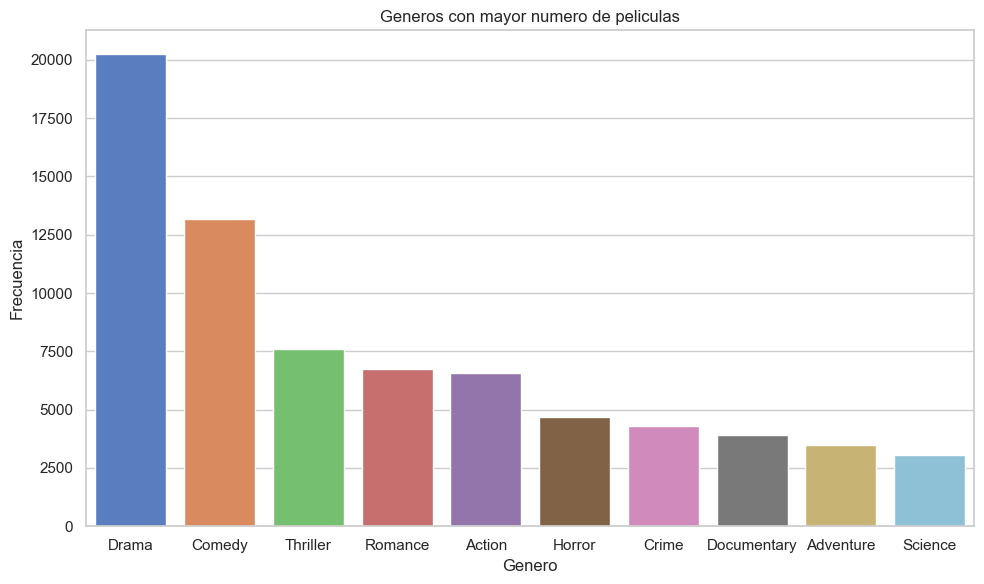

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_palabras.index, y=top_10_palabras.values, palette="muted")
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.title('Generos con mayor numero de peliculas')
plt.xticks()
plt.tight_layout()
plt.show()

Gracias a este histograma podemos observar la diferencia que hay entre el numero de peliculas por cada uno de los generos donde el genero con mayor frecuencia/número de peliculas es el genero drama-drama seguido de comedy-comedia

Para asociar este analisis exploratorio de datos con las funciones de consulta creadas en la API, se quiso observar los 10 paises y los 10 idiomas con mayor número de peliculas producidas.


In [16]:
lis=[]
for i in datos['iso_countries']:
    if i=='[nan]':
        lis.append('')
    else:
        for h in eval(i):
            if h=='':
                h=''
            lis.append(h)
paises=str(lis).replace(",", "").replace("[", "").replace("]", "").replace("'", "")

In [17]:
lista_palabras = paises.split()
serie_palabras = pd.Series(lista_palabras)
conteo_palabras=serie_palabras.value_counts()
top_10_palabras = conteo_palabras.head(10)
top_10_palabras

US    21147
GB     4091
FR     3939
DE     2254
IT     2168
CA     1765
JP     1648
ES      964
RU      911
IN      827
dtype: int64

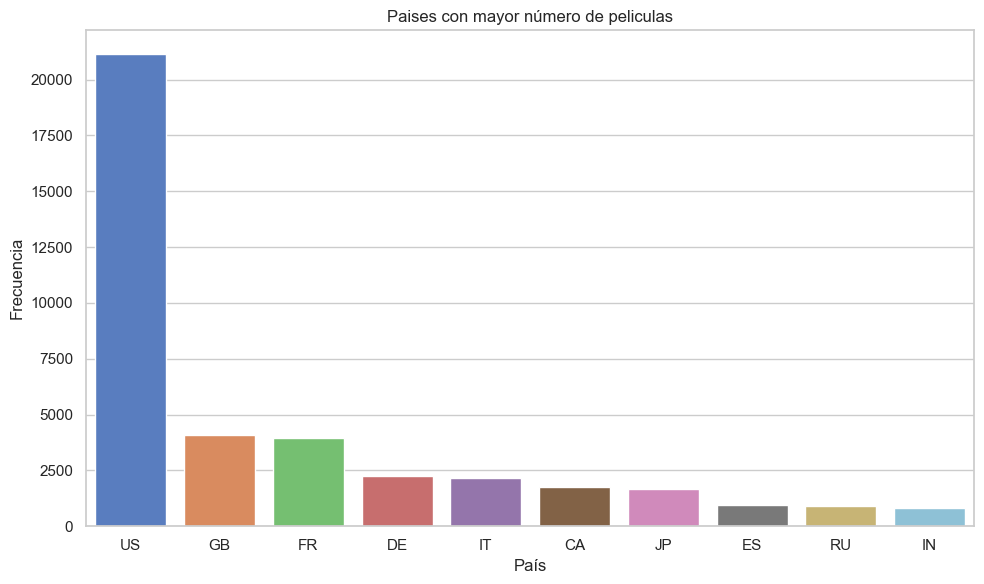

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_palabras.index, y=top_10_palabras.values, palette="muted")
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Paises con mayor número de peliculas')
plt.xticks()
plt.tight_layout()
plt.show()

En este histograma se pueden observar los paises con un mayor número de peliculas producidas donde el primero de la lista es United States of America seguido de United Kingdom y Germany

In [19]:
lis=[]
for i in datos['iso_lenguages']:
    if i=='[nan]':
        lis.append('')
    else:
        for h in eval(i):
            if h=='':
                h=''
            lis.append(h)
lenguages=str(lis).replace(",", "").replace("[", "").replace("]", "").replace("'", "")

In [21]:
lista_palabras = lenguages.split()
serie_palabras = pd.Series(lista_palabras)
conteo_palabras=serie_palabras.value_counts()
top_10_palabras = conteo_palabras.head(10)
top_10_palabras

en    28729
fr     4194
de     2624
es     2412
it     2366
ja     1758
ru     1562
zh      790
hi      707
pt      591
dtype: int64

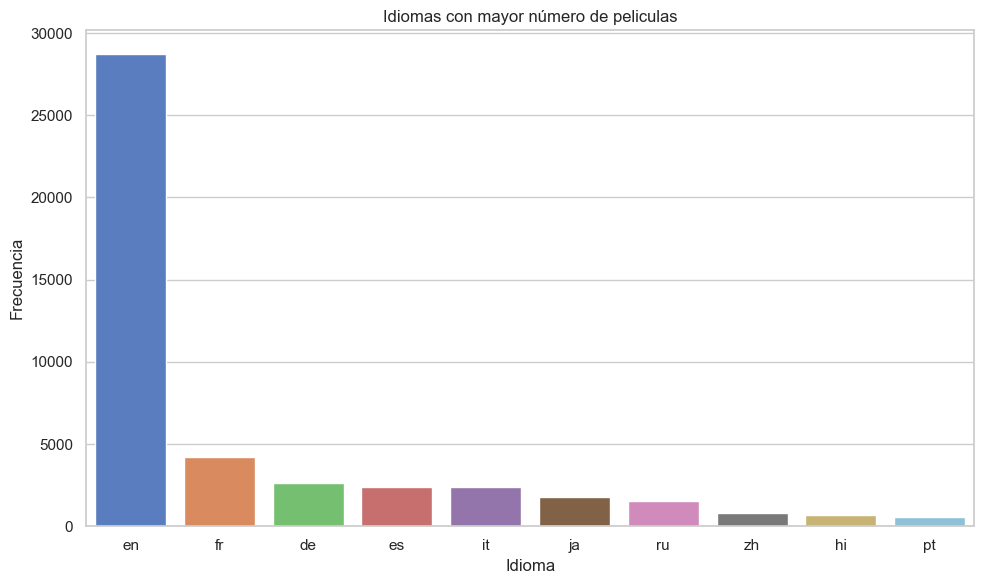

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_palabras.index, y=top_10_palabras.values, palette="muted")
plt.xlabel('Idioma')
plt.ylabel('Frecuencia')
plt.title('Idiomas con mayor número de peliculas')
plt.xticks()
plt.tight_layout()
plt.show()

Acá se observan los 10 idiomas mas frecuentes en peliculas donde la lista es liderada por el idioma Ingles seguido por Frances, Aleman y Español en ese orden.

Tambien se quiso evaluar cuales fueron las peliculas con mayor y menor duración 

In [39]:
datos[datos['title']=='Jumanji'].runtime

1    104.0
Name: runtime, dtype: float64

In [49]:
df = datos[['title', 'runtime']]
df_sin_nulos = df.dropna(subset=['runtime'])
# Ordenar el DataFrame por la columna 'duracion' de manera descendente
df_ordenado = df_sin_nulos.sort_values(by='runtime', ascending=False)
top_10_peliculas = df_ordenado.head(10)
top_10_peliculas

,title,runtime
24149,Centennial,1256.0
40873,Baseball,1140.0
19947,Jazz,1140.0
13762,Berlin Alexanderplatz,931.0
13947,Heimat: A Chronicle of Germany,925.0
27824,The Story of Film: An Odyssey,900.0
26652,Taken,877.0
19144,The War,874.0
34622,The Roosevelts: An Intimate History,840.0
34687,Seventeen Moments in Spring,840.0


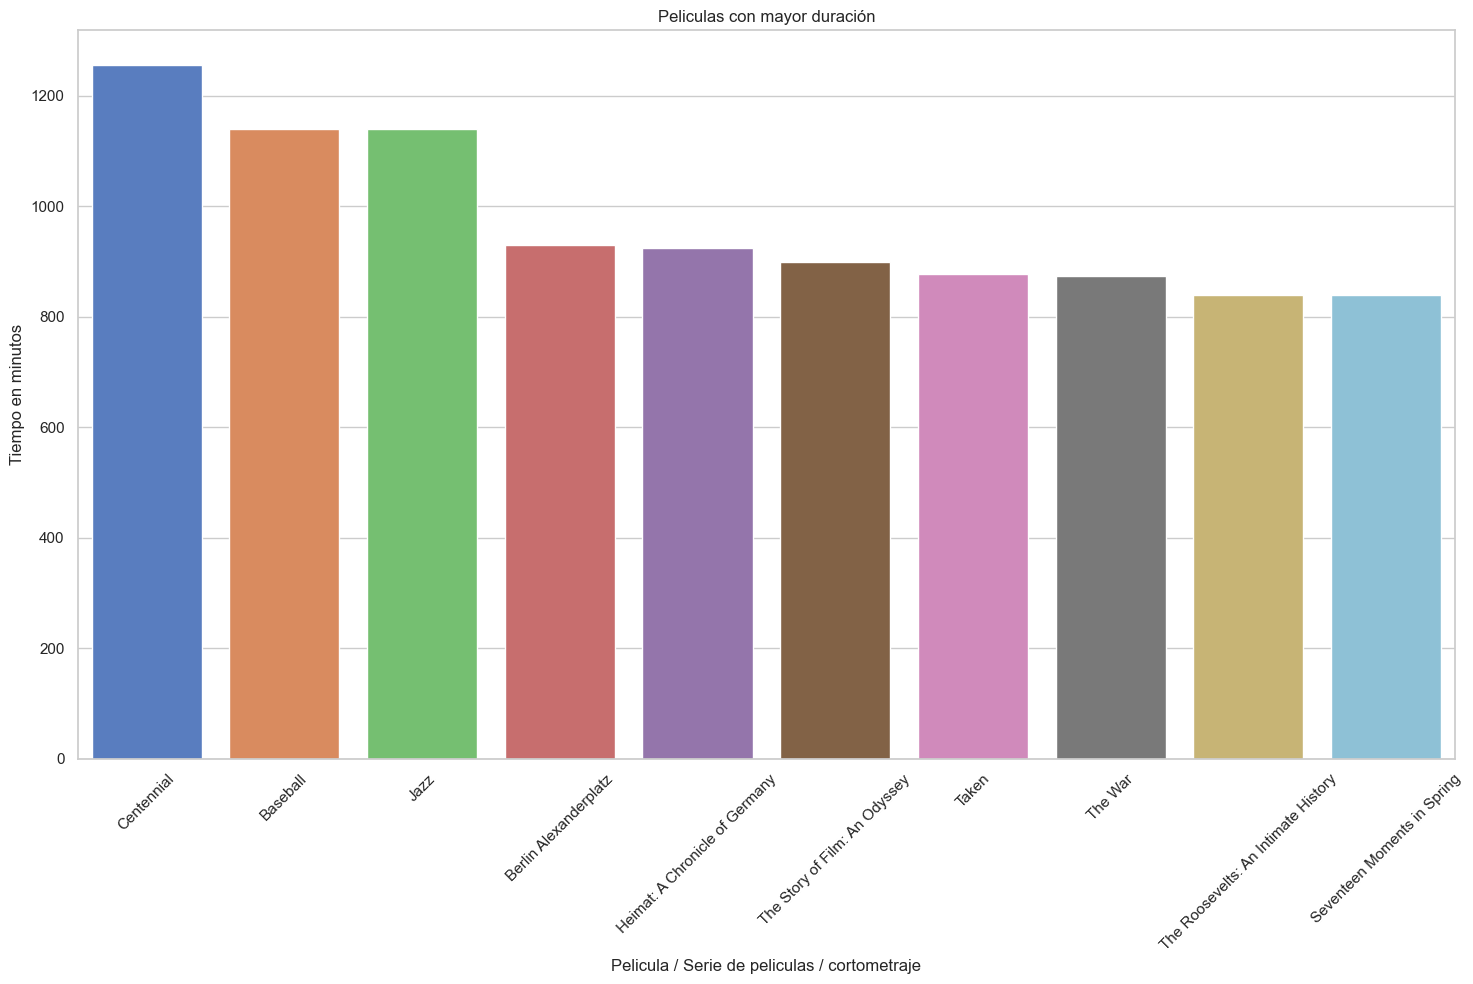

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_peliculas['title'], y=top_10_peliculas['runtime'], palette="muted")
plt.xlabel('Pelicula / Serie de peliculas / cortometraje')
plt.ylabel('Tiempo en minutos')
plt.title('Peliculas con mayor duración')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este grafico se observan las peliculas con mayor duración, el grafico es razonable ya que producciones como Centennial, baseball entre otras son series de peliculas o documentales que pueden tener una alta duración.

In [58]:
ultimas_peliculas=df_ordenado[df_ordenado['runtime']>0]
ultimas_peliculas.tail(20)

,title,runtime
44882,"Luis Martinetti, Contortionist",1.0
23789,Tables Turned on the Gardener,1.0
41729,Souvenir Strip of the Edison Kinetoscope,1.0
39383,Mickey Mouse in Vietnam,1.0
41811,Gold Rush Scenes in the Klondike,1.0
42624,Buffalo Dance,1.0
17558,Edison Kinetoscopic Record of a Sneeze,1.0
41810,Black Diamond Express,1.0
41809,Panorama of Esplanade by Night,1.0
41808,A Morning Bath,1.0


En esta tabla podemos ver una lista de cortometrajes o clips los cuales su duracion no supera la de un minuto, por esta razon son las ultimas peliculas de la lista tomando todas aquellas producciones con una duración mayor a 0 minutos.


Despues se quizo consultar cuales eran las colecciones con una mayor ganancia/revenue

In [126]:
ganancia_franquicia=datos[['name_collection','revenue']]
suma_ganancia_por_franquicia = ganancia_franquicia.groupby('name_collection')['revenue'].sum()
df = suma_ganancia_por_franquicia.reset_index()
df_ordenado = df.sort_values(by='revenue', ascending=False)
top_10_peliculas=df_ordenado.head(10)

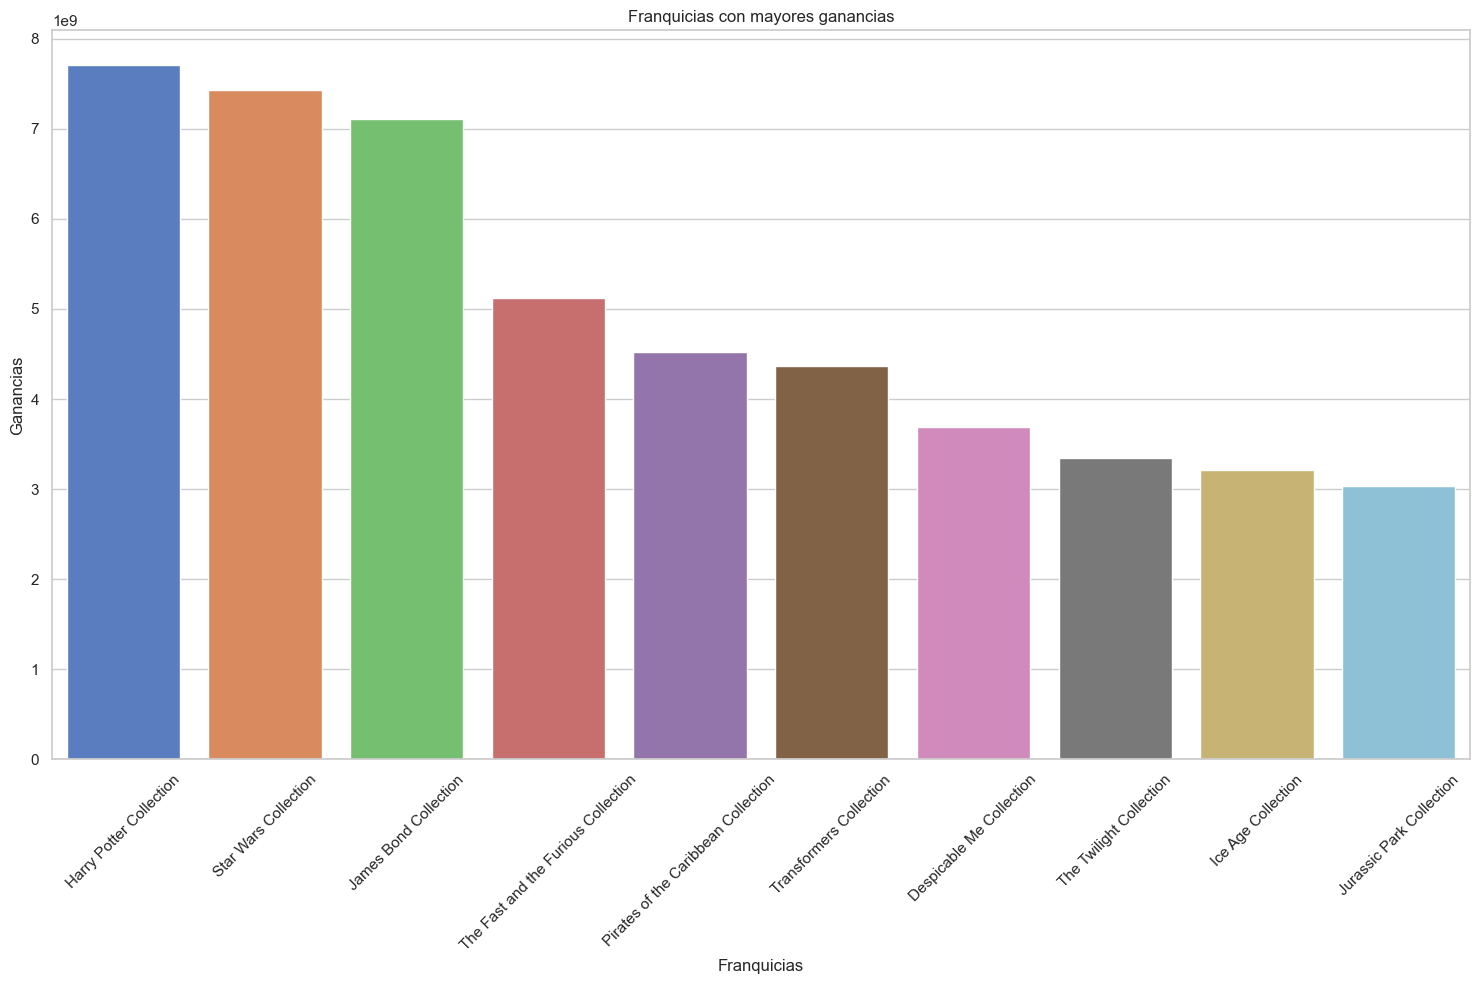

In [130]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_peliculas['name_collection'], y=top_10_peliculas['revenue'], palette="muted")
plt.xlabel('Franquicias')
plt.ylabel('Ganancias')
plt.title('Franquicias con mayores ganancias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el gráfico anterior, se resaltan las diez franquicias principales con las mayores ganancias, lideradas por la colección de Harry Potter, seguida por la colección de Star Wars y la colección de James Bond. Es importante tener en cuenta que algunas de estas franquicias tienen un extenso número de películas, lo que justifica que puedan alcanzar mayores ganancias.

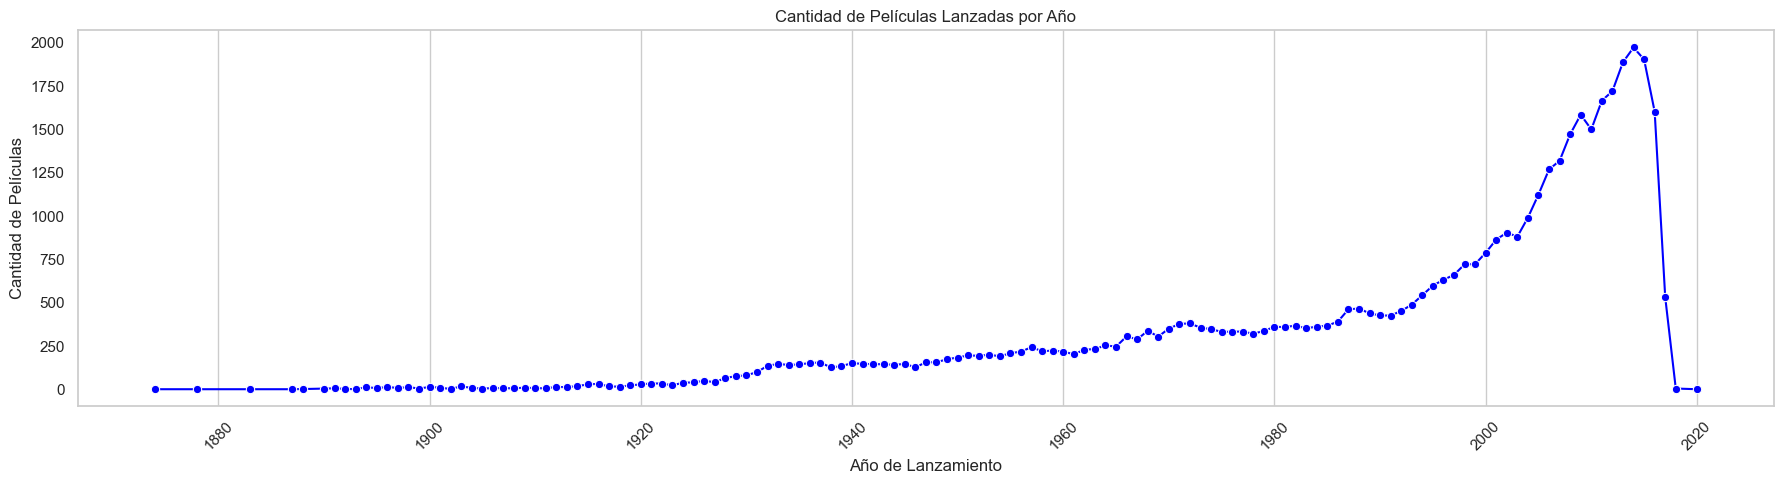

In [127]:
years = datos.groupby('release_year')['title'].count()
sns.set(style='whitegrid')
plt.figure(figsize=(18, 5))
sns.lineplot(data=years, color='blue', marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas Lanzadas por Año')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

En el gráfico, se aprecia un patrón que muestra un aumento en la producción de películas a partir de 1980 hasta el año 2020, que es la fecha límite del dataframe utilizado. Es importante tener en cuenta que los valores pueden disminuir después de esta fecha debido a que los datos no están actualizados y no incluyen películas estrenadas recientemente.

Otra información que se quiso brindar nace de la pregunta ¿Que tan cierto es que peliculas con un mayor presupuesto/buget esten asociadas a un mayor revenue/recauso? Para esto se hizo un plot que enseñara posibles tendencias entre estas dos variables.

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquanti

<Figure size 1000x800 with 0 Axes>

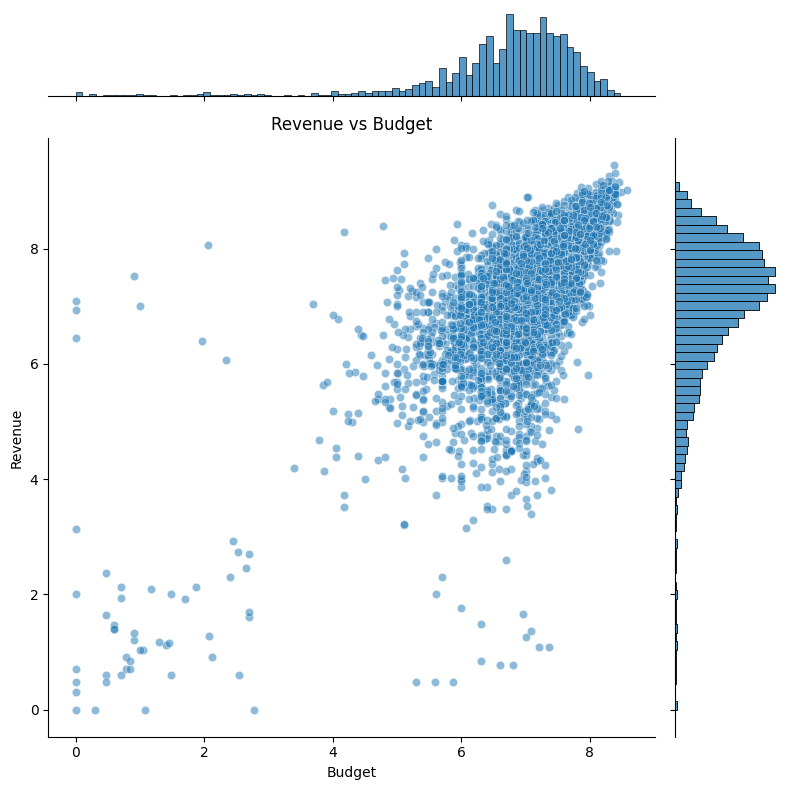

In [7]:
#Se realiza una transformacion logaritimica ya que los valores son muy grandes y puede que no se vea nada si se utilizan los valores originales
datos['log_budget'] = np.log10(datos['budget'])
datos['log_revenue'] = np.log10(datos['revenue'])

plt.figure(figsize=(10, 8))
sns.jointplot(x='log_budget', y='log_revenue', data=datos, marker='o', alpha=0.5, height=8)
sns.regplot(x='log_budget', y='log_revenue', data=datos, scatter=False, line_kws={'color': 'red'})
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.tight_layout()
plt.show()

In [133]:
correlacion = datos['revenue'].corr(datos['budget'])

print("Correlación entre revenue y budget:", correlacion)

Correlación entre revenue y budget: 0.7400344880742947


Segun este grafico parece ser que si hay una tendencia donde a medida que aumenta el presupuesto de la pelicula tambien aumenta la ganancia de la misma, esta tendencia parece romperse cuando los valores de presupuesto son mas bajos. Ademas se puede encontrar valores atipicos que puede que sean valores nulos tomados como 0.

Se ha querido observar tambien si un mayor presupuesto representa siempre una mayor popularidad

<Figure size 1000x800 with 0 Axes>

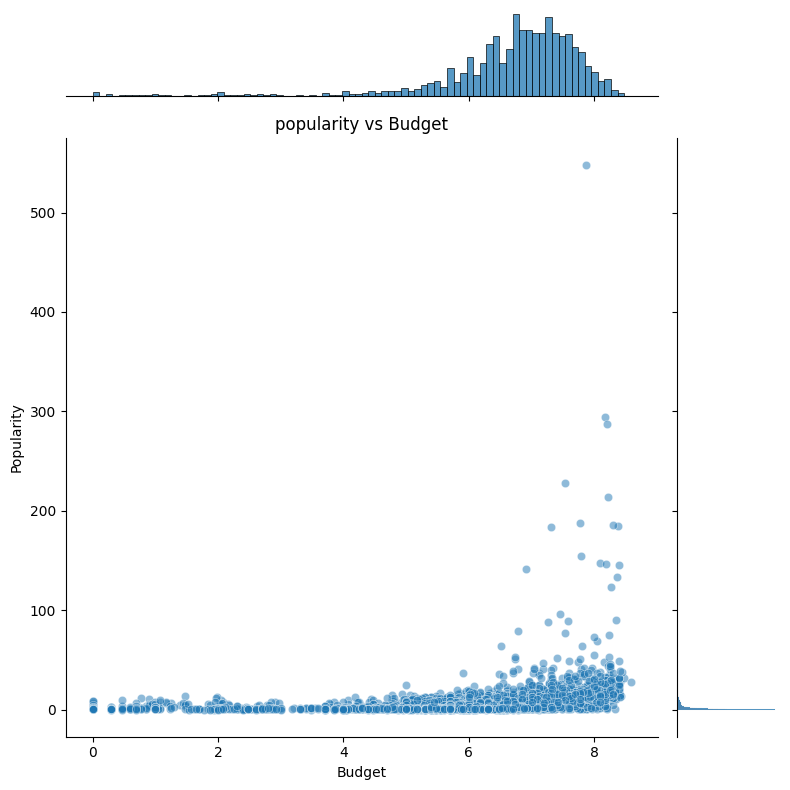

In [11]:

plt.figure(figsize=(10, 8))
sns.jointplot(x='log_budget', y=datos['popularity'].fillna(datos['popularity'].mean()), data=datos, marker='o', alpha=0.5, height=8)
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('popularity vs Budget')
plt.tight_layout()
plt.show()

Sin embargo con este grafico nos damos cuenta de que no siempre es asi, se puede tener un presupuesto muy alto pero su popularidad puede ser igual de baja a la de un presupuesto bajo.

C:\Users\jorge\AppData\Local\Temp\ipykernel_3076\1106032002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = datos.corr()


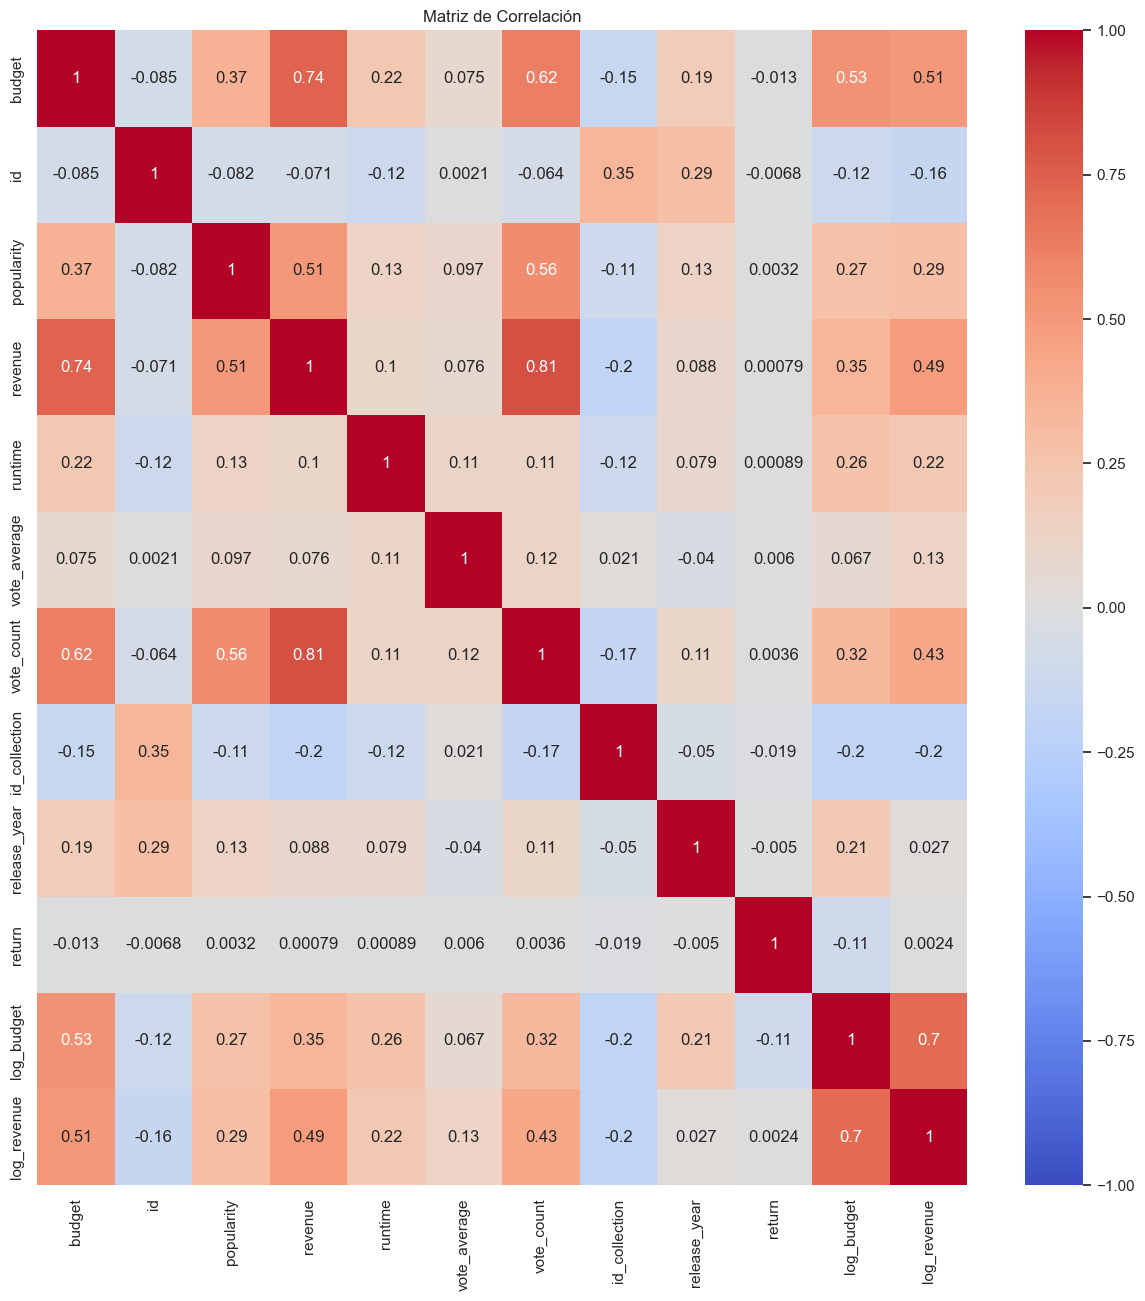

In [137]:
matriz_correlacion = datos.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Finalmente se hizo este grafico de correlación que nos permite hayar las posibles correlaciones entre las variables cuantitativas de nuestro dataframe, podemos ver que hay una fuerte correlación entre variables como (vote_count-revenue = 0.81) y (budget-revenue = 0.74) que fueron las variables que analizamos previamente. Con esto en mente se puede pasar al modelo de recomendación.